
# Project 2 :No-show appointments Data Analysis


## Introduction:

Introduction:
In this project, I’m going to move around all the Data Analysis processes and work with them in more detail inshallah.
I selected the Dataset which talks about (No-show appointments) This dataset collects information from 100k medical
appointments in Brazil and is focused on the question of whether or not patients show up for their appointment to
analyse it. it contains 14 columns: (PatientId, AppointmentID, Gender, scheduledDay, AppointmentDay, Age,
Neighbourhood, Scholarship, Hypertension, Diabetes, Alcoholism, Handicap, SMS_received, Not-show) and 110527 rows
before any modifications. I have questions that I’ll move around all the Data Analysis processes to answer it:

1.what is the appointment rate  of Show-up VS  No Show-up?

2.What factors are important for us to know in order to predict if a patient will show up for their 
scheduled appointment?


In [38]:
# import statements for all of the packages that i use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [39]:
# Load  data and print out a few lines
df=pd.read_csv('KaggleV2-May-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Assess the dataset:

In [40]:
df.shape

(110527, 14)

In [41]:
#Defind the unique value for each column
print("The unique value for Gender: ",df.Gender.unique())
print("The unique value for Age: ",sorted(df.Age.unique()))
print("The unique value for Neighbourhood: ",sorted(df.Neighbourhood.unique()))
print("The unique value for Scholarship: ",df.Scholarship.unique())
print("The unique value for Scholarship: ",df.Hipertension.unique())
print("The unique value for Diabetes: ",df.Diabetes.unique())
print("The unique value for Alcoholism: ",df.Alcoholism.unique())
print("The unique value for Handicap: ",df.Handcap.unique())
print("The unique value for SMS_received: ",df.SMS_received.unique())
print("The unique value for No-show: ",df['No-show'].unique())

The unique value for Gender:  ['F' 'M']
The unique value for Age:  [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
The unique value for Neighbourhood:  ['AEROPORTO', 'ANDORINHAS', 'ANTÔNIO HONÓRIO', 'ARIOVALDO FAVALESSA', 'BARRO VERMELHO', 'BELA VISTA', 'BENTO FERREIRA', 'BOA VISTA', 'BONFIM', 'CARATOÍRA', 'CENTRO', 'COMDUSA', 'CONQUISTA', 'CONSOLAÇÃO', 'CRUZAMENTO', 'DA PENHA', 'DE LOURDES', 'DO CABRAL', 'DO MOSCOSO', 'DO QUADRO', 'ENSEADA DO SUÁ', 'ESTRELINHA', 'FONTE GRANDE', 'FORTE SÃO JOÃO', 'FRADINHOS', 'GOIABEIRAS', 'GRANDE VITÓRIA', 'GURIGICA', 'HORTO', 'ILHA DAS CAIEIRAS', 'ILHA DE SANTA MARIA', 'ILHA DO BOI', 'ILHA DO FR

In [42]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [44]:
#Check and confirm the null values , in our Dataset there aren't null values:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [45]:
#Check, drop, and confirm the duplicate columns, in our dataset there aren't:
print("Num of dublicated : ", + sum(df.duplicated()))

Num of dublicated :  0


In [46]:
#Drop and confirm columns that will not use:
df.drop(['PatientId', 'AppointmentID', 'Hipertension', 'Diabetes'], axis =1, inplace=True)

In [47]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,No


In [48]:
#Check if there is any age <= zero :
df[df["Age"] <= 0]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Alcoholism,Handcap,SMS_received,No-show
59,F,2016-04-29T08:08:43Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,No
63,M,2016-04-27T10:46:12Z,2016-04-29T00:00:00Z,0,SÃO BENEDITO,0,0,0,0,No
64,M,2016-04-25T13:28:21Z,2016-04-29T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,1,No
65,M,2016-04-27T10:48:50Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,No
67,F,2016-04-29T08:53:02Z,2016-04-29T00:00:00Z,0,NOVA PALESTINA,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...
110345,F,2016-05-16T12:30:58Z,2016-06-01T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,No
110346,M,2016-06-06T14:22:34Z,2016-06-08T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,No
110454,F,2016-06-03T15:18:44Z,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,No
110460,F,2016-06-03T08:56:51Z,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,No


In [49]:
#Fix it by change the zero value with mean to be constant:
Age_Mean = df['Age'].mean()
print("the Mean of Age:",Age_Mean)
df[df['Age'] <= 0] = Age_Mean
df.head()

the Mean of Age: 37.08887421173107


,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62.0,MATA DA PRAIA,0.0,0.0,0.0,0.0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8.0,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,No


In [50]:
#Fixing the spelling problem in data columns:
df.rename(columns = {'Handcap': 'Handicap','No-show':'No_show'}, inplace = True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Alcoholism,Handicap,SMS_received,No_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62.0,MATA DA PRAIA,0.0,0.0,0.0,0.0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8.0,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,No


In [51]:
#Convert the datatype of the columns that has wrong data type:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Alcoholism,Handicap,SMS_received,No_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62.0,MATA DA PRAIA,0.0,0.0,0.0,0.0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8.0,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,No


In [52]:
#Convert No_show data to 0 and 1 instead of 'yes' and 'no' :
df.No_show.replace(['Yes', 'No'], [1, 0], inplace=True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Alcoholism,Handicap,SMS_received,No_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62.0,MATA DA PRAIA,0.0,0.0,0.0,0.0,0.0
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8.0,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,0.0
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0


In [53]:
#conver float to int
df['No_show'] =  df[["No_show"]].astype(int)

In [54]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Alcoholism,Handicap,SMS_received,No_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62.0,MATA DA PRAIA,0.0,0.0,0.0,0.0,0
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8.0,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,0
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0


In [55]:
#Convert other columns as boolean to be more consistent:
df['Scholarship'] =  df[["Scholarship"]].astype(bool)
df['Alcoholism'] =  df[["Alcoholism"]].astype(bool)

In [56]:
df['Handicap'] =  df[['Handicap']].astype(bool)
df['SMS_received'] =  df[['SMS_received']].astype(bool)

In [57]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Alcoholism,Handicap,SMS_received,No_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62.0,JARDIM DA PENHA,False,False,False,False,0
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,False,False,False,False,0
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62.0,MATA DA PRAIA,False,False,False,False,0
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8.0,PONTAL DE CAMBURI,False,False,False,False,0
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,False,False,False,False,0


In [58]:
#Convert age to int:
df['Age']=df['Age'].astype(int)

In [59]:
#Create a mask for people who came and Who not:
Showed = df['No_show'] == 0
Not_showed = df['No_show'] == 1
df['Showed'] = Showed
df['Not_showed'] = Not_showed

In [60]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Alcoholism,Handicap,SMS_received,No_show,Showed,Not_showed
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,False,False,False,False,0,True,False
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,False,False,False,0,True,False
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,False,False,False,False,0,True,False
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,False,False,False,False,0,True,False
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,False,False,False,0,True,False


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Gender          110527 non-null  object             
 1   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 2   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 3   Age             110527 non-null  int64              
 4   Neighbourhood   110527 non-null  object             
 5   Scholarship     110527 non-null  bool               
 6   Alcoholism      110527 non-null  bool               
 7   Handicap        110527 non-null  bool               
 8   SMS_received    110527 non-null  bool               
 9   No_show         110527 non-null  int64              
 10  Showed          110527 non-null  bool               
 11  Not_showed      110527 non-null  bool               
dtypes: bool(6), datetime64[ns, UTC](2), int64(2), object(2)
memory usage: 5.

In [62]:
#Save the cleaned version of the dataset in another file:
df.to_csv('no-showappointments-cleaned.csv', index = False)

<a id='eda'></a>
## Exploratory Data Analysis

### Question 1-what is the appointment rate  of Show-up VS  No Show-up?

In [63]:
#Get the rate of Show-up and No Show-up columns:
#1)Get the Showed columns value counts:
Show_rate= df['Showed'].value_counts()
print(Show_rate)

True     85307
False    25220
Name: Showed, dtype: int64


In [64]:
#2)Get the rate of Show-up and No Show-up columns:
Rate=Show_rate[1] / Show_rate.sum() * 100
print('The rate of Showed:',Rate)

The rate of Showed: 77.18204601590561


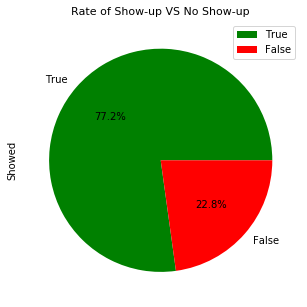

In [65]:
#2)Visualize the rate of Show-up and No Show-up columns:
colors=['green', 'red']
Rate_Chart =Show_rate.plot.pie(figsize=(5,11), autopct='%1.1f%%', fontsize = 10, colors= colors);
Rate_Chart.set_title("Rate of Show-up VS No Show-up" , fontsize = 11);
Rate_Chart.legend();



### As we can see rate of  Show-up is highest than no Show-up.

### Question 2:what are the most features of 'Age', 'being alcoholic', 'Having an SMS', 'Gender', 'Scholarship' in order to predict if a patient will show up for their scheduled appointment?

###### visualize the features to see the relation between the features and the people who came to their appointment:

In [66]:
#The mean age of people who show up and people who Not_showed:
Showed_mean=df.Age[Showed].mean()
NoShowed_mean=df.Age[Not_showed].mean()
print("the mean of Showed:",Showed_mean)
print("the mean of Not Showed:",NoShowed_mean)

the mean of Showed: 39.07518726482
the mean of Not Showed: 35.329151291512915


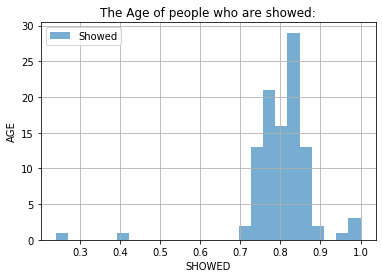

In [67]:
# visualize the average of people who showed :
Group_AgeShowed=df.groupby('Age')['Showed'].mean()
Group_AgeShowed.hist(alpha=0.6,bins=25,label='Showed');
#visualize details:
plt.xlabel("SHOWED")
plt.ylabel("AGE")
plt.title("The Age of people who are showed:")
plt.legend()

Alcoholism
False    0.797321
True     0.388841
Name: Showed, dtype: float64


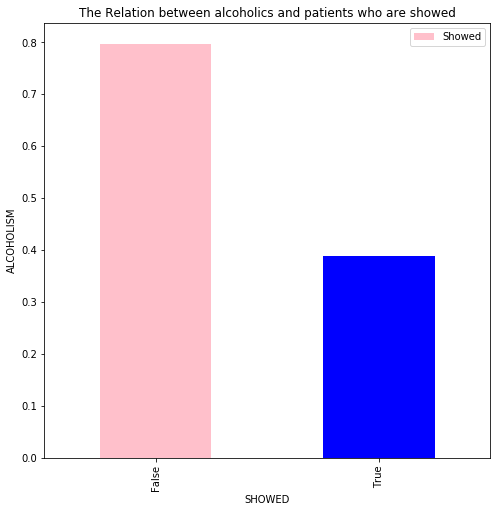

In [68]:
#Visualize the relation between alcoholic people who are showed up and who are not showed up:
Group_ChoShowed=df.groupby('Alcoholism')['Showed'].mean()
print(Group_ChoShowed)
colors=['pink', 'blue']
Group_ChoShowed.plot(kind='bar',figsize=(8,8), color= colors);
plt.xlabel("SHOWED")
plt.ylabel("ALCOHOLISM")
plt.title("The Relation between alcoholics and patients who are showed")
plt.legend()

SMS_received
False    0.832712
True     0.656184
Name: Showed, dtype: float64


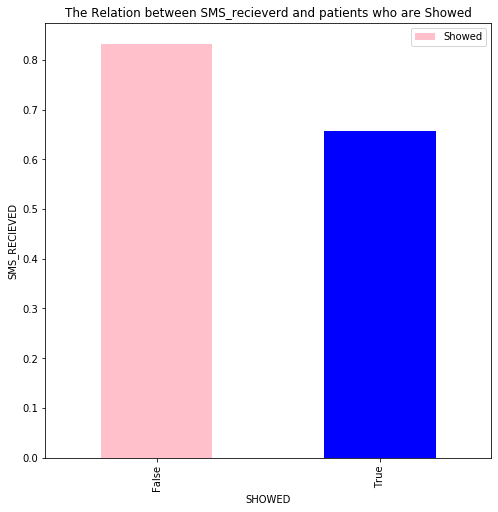

In [69]:
#Visualize the relation between SMS received and people who showed up and who are not:
Group_SmsRcvSh=df.groupby('SMS_received')['Showed'].mean()
print(Group_SmsRcvSh)
colors=['pink', 'blue']
Group_SmsRcvSh.plot(kind='bar',figsize=(8,8),color=colors);
plt.xlabel("SHOWED")
plt.ylabel("SMS_RECIEVED")
plt.title("The Relation between SMS_recieverd and patients who are Showed")
plt.legend()

Gender
37.08887421173107    0.000000
F                    0.796415
M                    0.799154
Name: Showed, dtype: float64


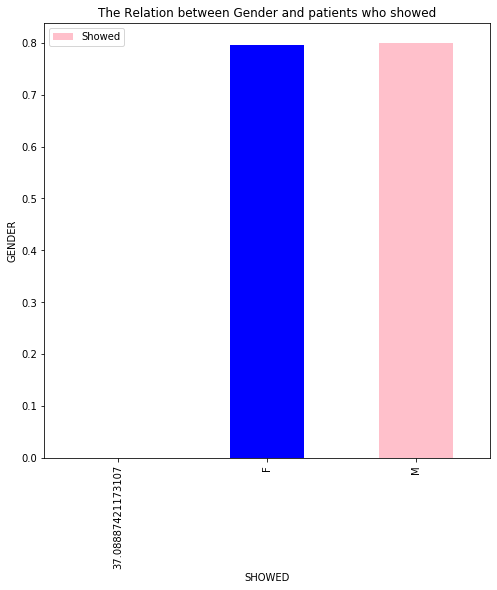

In [70]:
#Visualize the relation betweenand the Gender and people who are showed up and who are not:
Group_GenderdSh=df.groupby('Gender')['Showed'].mean()
print(Group_GenderdSh)
colors=['pink', 'blue']
Group_GenderdSh.plot(kind='bar',figsize=(8,8),color=colors);
plt.xlabel("SHOWED")
plt.ylabel("GENDER")
plt.title("The Relation between Gender and patients who showed")
plt.legend()

Scholarship
False    0.801316
True     0.574117
Name: Showed, dtype: float64


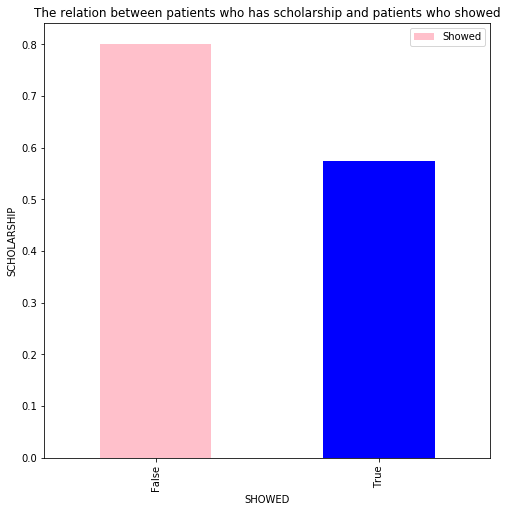

In [71]:
#Visualize the relation between people who has scholarship and people who are showed up and who are not:
Group_schSh=df.groupby('Scholarship')['Showed'].mean()
print(Group_schSh)
colors=['pink', 'blue']
Group_schSh.plot(kind = 'bar',figsize=(8,8),color=colors)
plt.xlabel("SHOWED")
plt.ylabel("SCHOLARSHIP")
plt.title("The relation between patients who has scholarship and patients who showed")
plt.legend()

<a id='conclusions'></a>
## Conclusions

1-people who received SMS have 10% higher probability to show up to their appointments.

2-Age is the most important factor that we can take into consideration that decides if a patient would come or not.

3-the average age for people who will be most likely to show up is 37, and the average age for people who are not likely to show up is 34.

4- As we can see most of the people who have Scholarship are most likely to miss their appointments with a percentage of 76.2% of showing and patients who don't have a scholarship have the percentage 80.1%

5-As we can see female and male has close presenting

6-The rate of  Show-up is highest than no Show-up
## Submitting your Project 
## Resources:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html

https://stackoverflow.com/questions/38802675/create-bool-mask-from-filter-results-in-pandas

https://matplotlib.org/3.1.0/gallery/color/named_colors.html

In [72]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0